In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [3]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


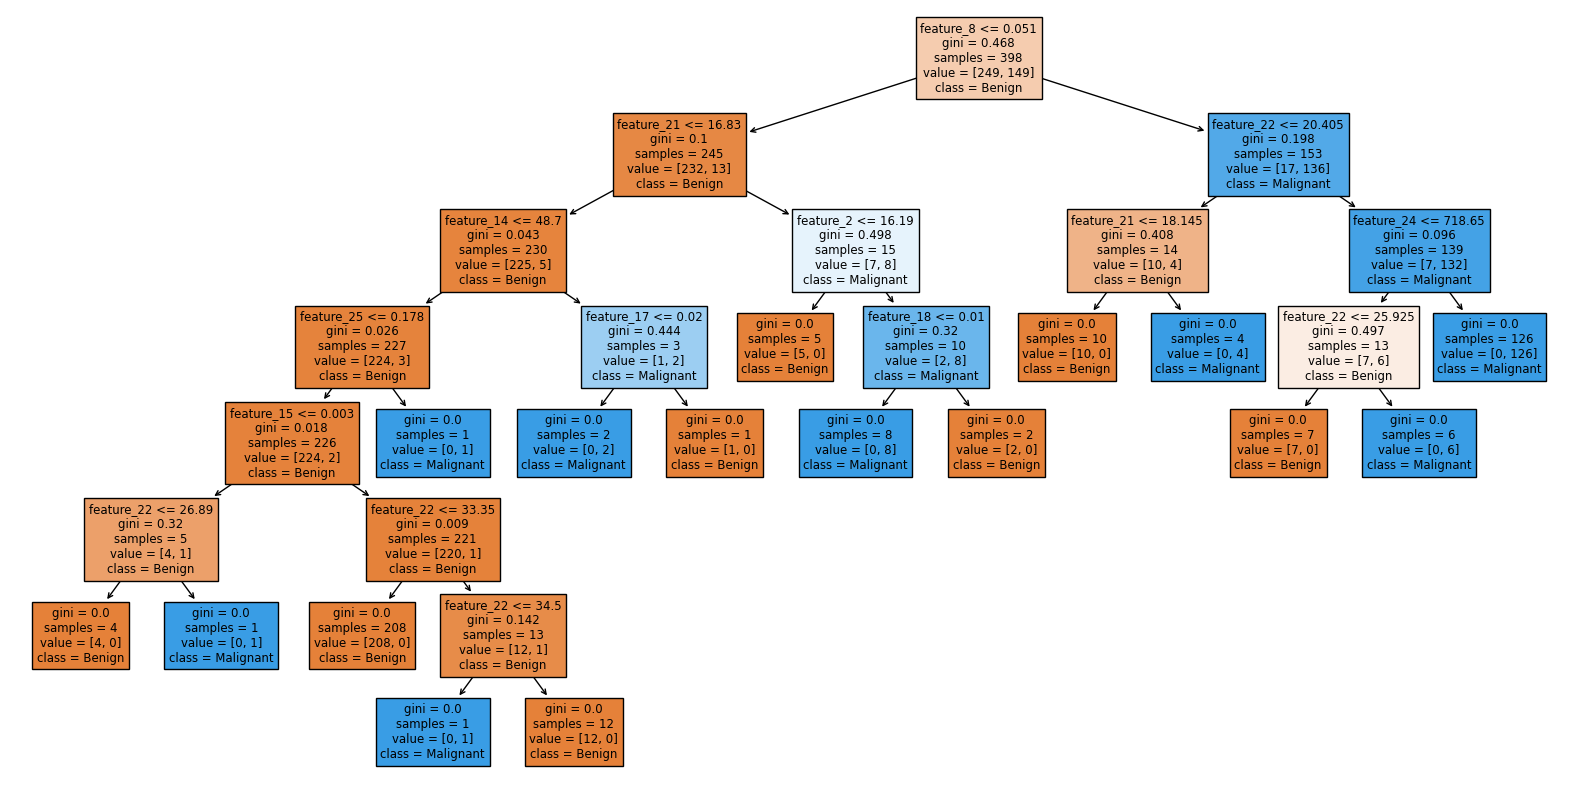

Accuracy of the Decision Tree model: 0.94


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

X = data.iloc[:, 2:]  # features
y = data['Diagnosis']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'])
plt.show()

# Evaluate the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

feature_importances = dt_classifier.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)

def train_logistic_regression(n_features):
    # Select top n features
    top_features = features_df.head(n_features)['Feature']
    
    # Train Logistic Regression
    log_reg = LogisticRegression(max_iter=2000, random_state=42)

    log_reg.fit(X_train[top_features], y_train)
    
    # Predict on test set
    y_pred = log_reg.predict(X_test[top_features])
    
    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with top {n_features} features: {accuracy:.2f}")

for n in [5, 10, 15, 20]:
    train_logistic_regression(n)

Accuracy with top 5 features: 0.97
Accuracy with top 10 features: 0.96
Accuracy with top 15 features: 0.97
Accuracy with top 20 features: 0.96


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

X = data.iloc[:, 2:]  # features
y = data['Diagnosis']  # target

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can vary the number of trees with n_estimators
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Test Accuracy of the Random Forest model: {test_accuracy:.2f}")

Test Accuracy of the Random Forest model: 0.97


In [12]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Define the range of the number of trees to explore
trees_range = range(1, 101, 10)  # From 1 to 100 with steps of 10

train_accuracies = []
test_accuracies = []

for n_trees in trees_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    y_train_pred = rf_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    y_test_pred = rf_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

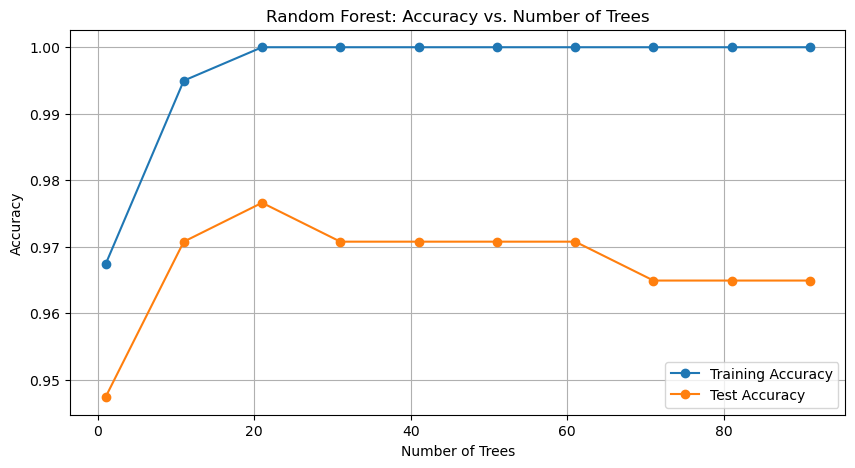

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(trees_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(trees_range, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Random Forest: Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()